In [2]:
!pip install pandas numpy seaborn matplotlib

In [3]:
import numpy as np

In [4]:
import pandas as pd
order_items=pd.read_csv(r'C:\Users\shivani\Downloads\archive (1)\olist_order_items_dataset.csv',parse_dates=True)
orders=pd.read_csv(r'C:\Users\shivani\Downloads\archive (1)\olist_orders_dataset.csv',parse_dates=True)
customers=pd.read_csv(r'C:\Users\shivani\Downloads\archive (1)\olist_customers_dataset.csv',parse_dates=True)
products=pd.read_csv(r'C:\Users\shivani\Downloads\archive (1)\olist_products_dataset.csv',parse_dates=True)
order_payments=pd.read_csv(r'C:\Users\shivani\Downloads\archive (1)\olist_order_payments_dataset.csv',parse_dates=True)
geolocation=pd.read_csv(r'C:\Users\shivani\Downloads\archive (1)\olist_geolocation_dataset.csv',parse_dates=True)
order_reviews=pd.read_csv(r'C:\Users\shivani\Downloads\archive (1)\olist_order_reviews_dataset.csv',parse_dates=True)
sellers=pd.read_csv(r'C:\Users\shivani\Downloads\archive (1)\olist_sellers_dataset.csv',parse_dates=True)
product_cateory_name=pd.read_csv(r'C:\Users\shivani\Downloads\archive (1)\product_category_name_translation.csv',parse_dates=True)

In [5]:
#Cleaning Of order_items
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [7]:
order_items.rename(columns={'freight_value':'shipping_cost'},inplace=True)

In [8]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,shipping_cost
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
shipping_cost          float64
dtype: object

In [10]:
#Changing col. DataType
date_col=['shipping_limit_date']
order_items[date_col]=order_items[date_col].apply(pd.to_datetime, errors='coerce')

In [11]:
#Cleaning of orders
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
#changing datatype to date
date_col=['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
orders[date_col]=orders[date_col].apply(pd.to_datetime,errors='coerce')

In [13]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [14]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [15]:
orders['order_approved_at_flag']=orders['order_approved_at'].apply(lambda x: 'Not Approved' if pd.isnull(x) else 'Approved')

In [16]:
orders['order_delivered_carrier_date_flag']=orders['order_delivered_carrier_date'].apply(lambda x: 'Not Shipped' if pd.isnull(x) else 'Shipped')

In [17]:
orders['order_delivered_customer_date_flag']=orders['order_delivered_customer_date'].apply(lambda x: 'Not Delivered' if pd.isnull(x) else 'Delivered')

In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   order_id                            99441 non-null  object        
 1   customer_id                         99441 non-null  object        
 2   order_status                        99441 non-null  object        
 3   order_purchase_timestamp            99441 non-null  datetime64[ns]
 4   order_approved_at                   99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date        97658 non-null  datetime64[ns]
 6   order_delivered_customer_date       96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date       99441 non-null  datetime64[ns]
 8   order_approved_at_flag              99441 non-null  object        
 9   order_delivered_carrier_date_flag   99441 non-null  object        
 10  order_delivered_custom

In [19]:
def order_stage(x):
    if x in['created','approved']:
        return 'Pre-processing'
    elif x in['processing', 'invoiced']:
        return 'In process'
    elif x == 'shipped':
        return 'Shipped'
    elif x == 'delivered':
        return 'Delivered'
    elif x in ['canceled','failed']:
        return 'Failed'
    else: 
        return 'Other'

In [20]:
orders['order_status']=orders['order_status'].apply(order_stage)

In [21]:
orders['order_status'].unique()

array(['Delivered', 'In process', 'Shipped', 'Other', 'Failed',
       'Pre-processing'], dtype=object)

In [22]:
#orders.replace({pd.NaT: None}, inplace=True)
#orders.replace({pd.NaT: None, "None": None, "": None}, inplace=True)

In [23]:
orders.isnull().sum() #We cant fill these null values because it shows orders that are not fullfiled as per the requirement

order_id                                 0
customer_id                              0
order_status                             0
order_purchase_timestamp                 0
order_approved_at                      160
order_delivered_carrier_date          1783
order_delivered_customer_date         2965
order_estimated_delivery_date            0
order_approved_at_flag                   0
order_delivered_carrier_date_flag        0
order_delivered_customer_date_flag       0
dtype: int64

In [24]:
#Cleaning customers
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [25]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [26]:
#Cleaning products
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [27]:
products.rename(columns={'product_name_lenght':'product_name_length','product_description_lenght':'product_description_length'}, inplace=True)

In [28]:
for col in ['product_weight_g','product_length_cm','product_height_cm','product_width_cm']:
    products[col].fillna(products[col].median(), inplace=True)

C:\Users\shivani\AppData\Local\Temp\ipykernel_15504\1871340958.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products[col].fillna(products[col].median(), inplace=True)
C:\Users\shivani\AppData\Local\Temp\ipykernel_15504\1871340958.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [29]:
sold_products=order_items['product_id'].unique()

In [30]:
sold_products

array(['4244733e06e7ecb4970a6e2683c13e61',
       'e5f2d52b802189ee658865ca93d83a8f',
       'c777355d18b72b67abbeef9df44fd0fd', ...,
       'dd469c03ad67e201bc2179ef077dcd48',
       'bbe7651fef80287a816ead73f065fc4b',
       '350688d9dc1e75ff97be326363655e01'], shape=(32951,), dtype=object)

In [31]:
incomplete_products=products[products['product_category_name'].isnull()]

In [32]:
incomplete_products

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [33]:
incomplete_products_sold=incomplete_products[incomplete_products['product_id'].isin(sold_products)]


In [34]:
print(f"Incomplete products that were sold: {len(incomplete_products_sold)}")

Incomplete products that were sold: 610


In [35]:
products.fillna({'product_category_name':'Unknown'}, inplace=True)

In [36]:
products.fillna({'product_name_length':0}, inplace=True)

In [37]:
products.fillna({'product_description_length':0}, inplace=True)

In [38]:
products.fillna({'product_photos_qty':0}, inplace=True)

In [39]:
products.isnull().sum()

product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [40]:
#Cleaning order_payments
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [41]:
order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [42]:
#Cleaning geolocation
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [43]:
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [44]:
#Cleaning order_reviews
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [45]:
order_reviews.fillna({'review_comment_title':'No Title'},inplace=True)

In [46]:
order_reviews.fillna({'review_comment_message':'No Review'}, inplace=True)

In [47]:
date_col=['review_creation_date','review_answer_timestamp']
order_reviews[date_col]=order_reviews[date_col].apply(pd.to_datetime, errors='coerce')

In [48]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [49]:
#Cleaning sellers
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [50]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [51]:
#cleaning product_category_name
product_cateory_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [52]:
product_cateory_name.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [53]:
''' Identity realtionship between tables(merging of tables)
orders table --> primary key=order_id
order_items--> order_id & product_id
customers--> customer_id joins with orders
payments--> order_id joins with orders
order_reviews--> order_id joins with ordes
products--> product_id joins with order_items'''

' Identity realtionship between tables(merging of tables)\norders table --> primary key=order_id\norder_items--> order_id & product_id\ncustomers--> customer_id joins with orders\npayments--> order_id joins with orders\norder_reviews--> order_id joins with ordes\nproducts--> product_id joins with order_items'

In [54]:
#Full merge Pipleline

#merge orders with customers
df=pd.merge(orders,customers, on='customer_id', how='left')

#merge with payments now
df=pd.merge(df, order_payments, on='order_id', how='left')

# merge with order_reviews
df=pd.merge(df, order_reviews, on='order_id', how='left')

# merge with order_items
df=pd.merge(df, order_items, on='order_id', how='left')

# merge order_items with products
df=pd.merge(df, products, on ='product_id', how='left')

In [55]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approved_at_flag,order_delivered_carrier_date_flag,...,price,shipping_cost,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Approved,Shipped,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Approved,Shipped,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Approved,Shipped,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,Delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Approved,Shipped,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,Delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Approved,Shipped,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0


In [56]:
df.shape

(119143, 39)

In [57]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_approved_at_flag', 'order_delivered_carrier_date_flag',
       'order_delivered_customer_date_flag', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'shipping_cost',
       'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [58]:
#Feature Engineering Goal
# We will create new columns/varibales that make the analysis more powerfull and help answer real_world business question

In [59]:
#Basic Feature Engineering
#Calculate Delivery time-In days
df['delivery_days']=(df['order_delivered_customer_date']-df['order_purchase_timestamp']).dt.days

In [60]:
df['delivery_days']

0          8.0
1          8.0
2          8.0
3         13.0
4          9.0
          ... 
119138    22.0
119139    24.0
119140    17.0
119141    17.0
119142     7.0
Name: delivery_days, Length: 119143, dtype: float64

In [61]:
#Calculate delay compared to estimated delivery
df['delivery_delay_days']=(df['order_delivered_customer_date']-df['order_estimated_delivery_date']).dt.days

In [62]:
df['delivery_delay_days']

0         -8.0
1         -8.0
2         -8.0
3         -6.0
4        -18.0
          ... 
119138    -2.0
119139    -6.0
119140   -21.0
119141   -21.0
119142   -18.0
Name: delivery_delay_days, Length: 119143, dtype: float64

In [63]:
#Payments per installment
df['payment_per_installment']=df['payment_value']/df['payment_installments']
df['payment_per_installment']=df['payment_per_installment'].replace([np.inf, -np.inf],np.nan).fillna(0)


In [64]:
df['payment_per_installment']

0          18.120000
1           2.000000
2          18.590000
3         141.460000
4          59.706667
             ...    
119138     65.000000
119139     54.202000
119140    110.290000
119141    110.290000
119142     86.860000
Name: payment_per_installment, Length: 119143, dtype: float64

In [65]:
#Price vs Payment difference(fraud detection feature)
df['payment_price_gap']=df['payment_value']-df['price']

In [66]:
df['payment_price_gap']

0         -11.87
1         -27.99
2         -11.40
3          22.76
4          19.22
           ...  
119138     20.10
119139     65.02
119140    261.17
119141    261.17
119142     18.36
Name: payment_price_gap, Length: 119143, dtype: float64

In [67]:
#Reviews sentiment
df['review_sentiment']=df['review_score'].apply(lambda x: 'Positive' if x >=4 else 'Negative' if x<=2 else 'Neutral')

In [68]:
df['review_sentiment']


0         Positive
1         Positive
2         Positive
3         Positive
4         Positive
            ...   
119138    Positive
119139    Positive
119140    Negative
119141    Negative
119142    Positive
Name: review_sentiment, Length: 119143, dtype: object

In [69]:
#Shipping efficinecy
df['delievery_status']=df['delivery_delay_days'].apply(lambda x: 'Late' if x>0 else 'On-Time/Early')

In [70]:
df['delievery_status']

0         On-Time/Early
1         On-Time/Early
2         On-Time/Early
3         On-Time/Early
4         On-Time/Early
              ...      
119138    On-Time/Early
119139    On-Time/Early
119140    On-Time/Early
119141    On-Time/Early
119142    On-Time/Early
Name: delievery_status, Length: 119143, dtype: object

In [71]:
df['delievery_status'].unique()

array(['On-Time/Early', 'Late'], dtype=object)

In [72]:
#RFM segmentation(customer analytics)
latest_date=df['order_purchase_timestamp'].max()


In [73]:
rfm=df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x:(latest_date-x.max()).days,'order_id':'nunique','payment_value':'sum'
}).reset_index()


In [74]:
rfm

,customer_unique_id,order_purchase_timestamp,order_id,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,585,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89
...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,495,1,4134.84
96092,fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58
96093,ffff371b4d645b6ecea244b27531430a,617,1,112.46
96094,ffff5962728ec6157033ef9805bacc48,168,1,133.69


In [75]:
rfm.columns=['customer_unique_id','Recency','Frequency','Monetary']

In [76]:
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,585,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89


In [77]:
df=df.merge(rfm,on='customer_unique_id', how='left')

In [78]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approved_at_flag,order_delivered_carrier_date_flag,...,product_width_cm,delivery_days,delivery_delay_days,payment_per_installment,payment_price_gap,review_sentiment,delievery_status,Recency,Frequency,Monetary
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Approved,Shipped,...,13.0,8.0,-8.0,18.120000,-11.87,Positive,On-Time/Early,380,2,82.82
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Approved,Shipped,...,13.0,8.0,-8.0,2.000000,-27.99,Positive,On-Time/Early,380,2,82.82
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Approved,Shipped,...,13.0,8.0,-8.0,18.590000,-11.40,Positive,On-Time/Early,380,2,82.82
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,Delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Approved,Shipped,...,19.0,13.0,-6.0,141.460000,22.76,Positive,On-Time/Early,84,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,Delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Approved,Shipped,...,21.0,9.0,-18.0,59.706667,19.22,Positive,On-Time/Early,70,1,179.12


In [79]:
#Time based Insights
df['purcahse_day_of_week']=df['order_purchase_timestamp'].dt.day_name()

In [80]:
df['purcahse_day_of_week']

0            Monday
1            Monday
2            Monday
3           Tuesday
4         Wednesday
            ...    
119138      Tuesday
119139       Sunday
119140       Monday
119141       Monday
119142     Thursday
Name: purcahse_day_of_week, Length: 119143, dtype: object

In [81]:
df['purchase_hour']=df['order_purchase_timestamp'].dt.hour

In [82]:
df['purchase_hour']

0         10
1         10
2         10
3         20
4          8
          ..
119138    12
119139    14
119140    21
119141    21
119142    20
Name: purchase_hour, Length: 119143, dtype: int32

In [83]:
#NLP Sentiment falgging from reviews
df['review_cotains_bad']=df['review_comment_message'].str.contains('bad|delay|broken', case=False, na=False).astype(int)

In [84]:
df['review_cotains_bad'].unique()

array([0, 1])

In [85]:
df['review_contains_good']=df['review_comment_message'].str.contains('good|amazing|perfect', case=False, na=False).astype(int)

In [86]:
df['review_contains_good'].unique()

array([0, 1])

In [87]:
#customer lifetime value(CLV)
df['customer_clv_proxy']=df['Frequency']*df['Monetary']

In [88]:
df['customer_clv_proxy']

0         165.64
1         165.64
2         165.64
3         141.46
4         179.12
           ...  
119138    195.00
119139    271.01
119140    882.32
119141    882.32
119142     86.86
Name: customer_clv_proxy, Length: 119143, dtype: float64

In [89]:
# to convert NaT to null 
df.replace({'NaT':r'\N'}, inplace=True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 53 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   order_id                            119143 non-null  object        
 1   customer_id                         119143 non-null  object        
 2   order_status                        119143 non-null  object        
 3   order_purchase_timestamp            119143 non-null  datetime64[ns]
 4   order_approved_at                   118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date        117057 non-null  datetime64[ns]
 6   order_delivered_customer_date       115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date       119143 non-null  datetime64[ns]
 8   order_approved_at_flag              119143 non-null  object        
 9   order_delivered_carrier_date_flag   119143 non-null  object        
 10  order_de

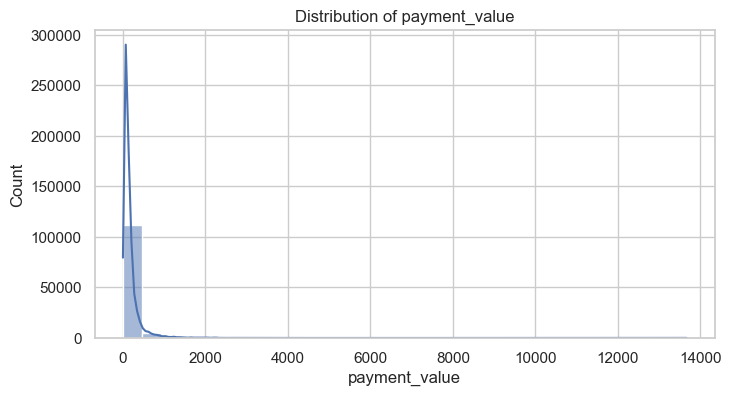

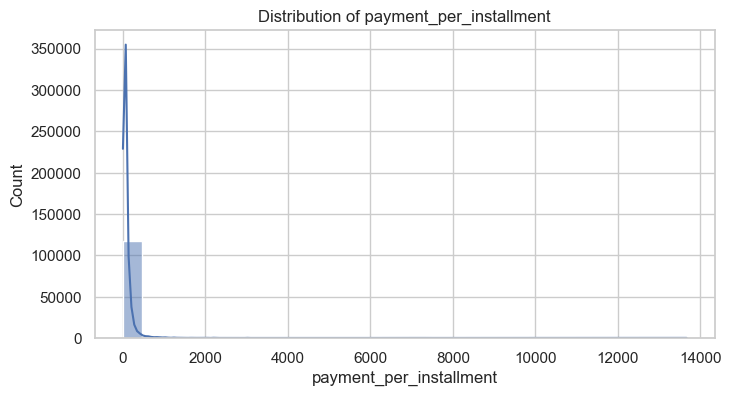

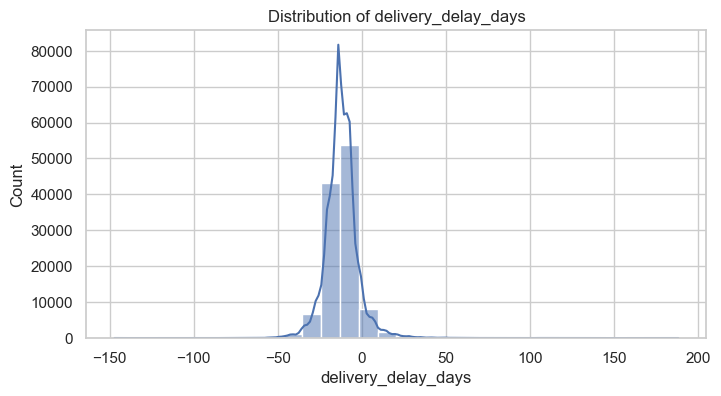

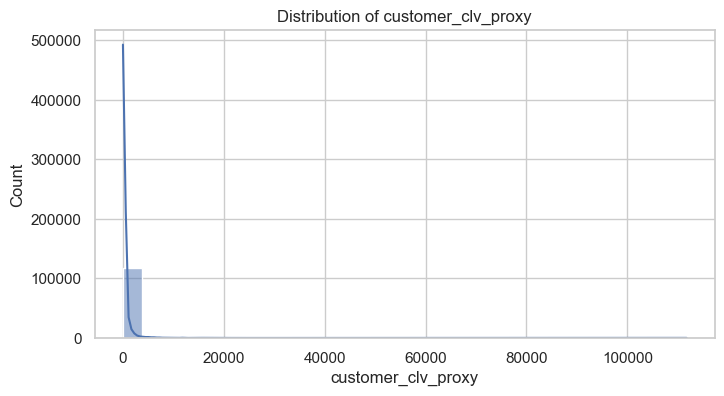

In [91]:
#Univariate EDA(Exploratory Data Analysis)

import seaborn as sns
import matplotlib.pyplot as plt
#set style
sns.set(style='whitegrid')

#Histogram
numeric_cols=['payment_value','payment_per_installment','delivery_delay_days','customer_clv_proxy']

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

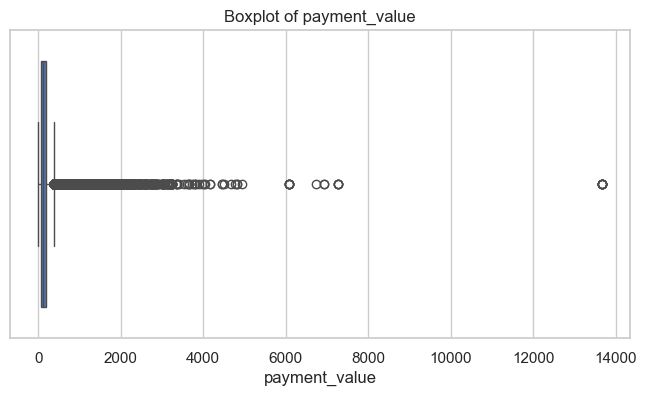

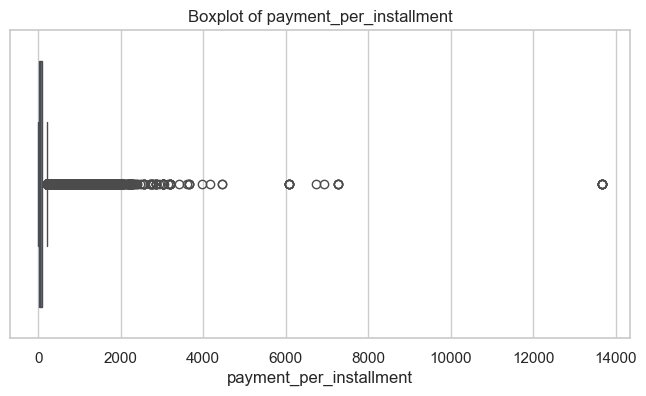

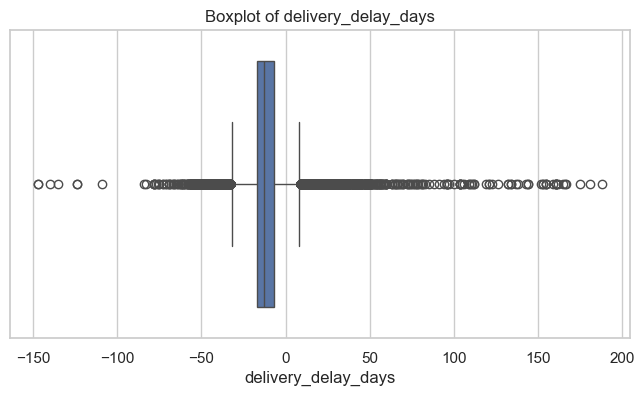

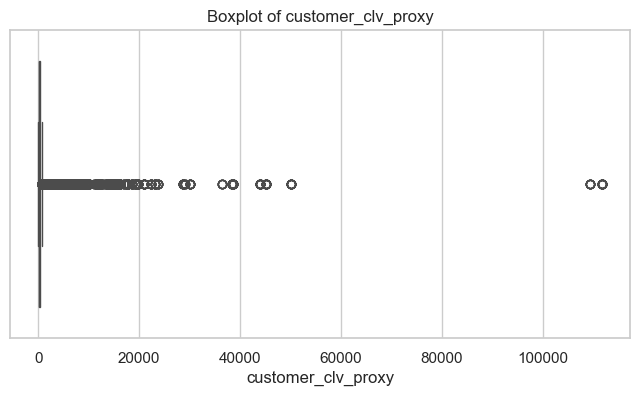

In [92]:
#Boxplot for outliers
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

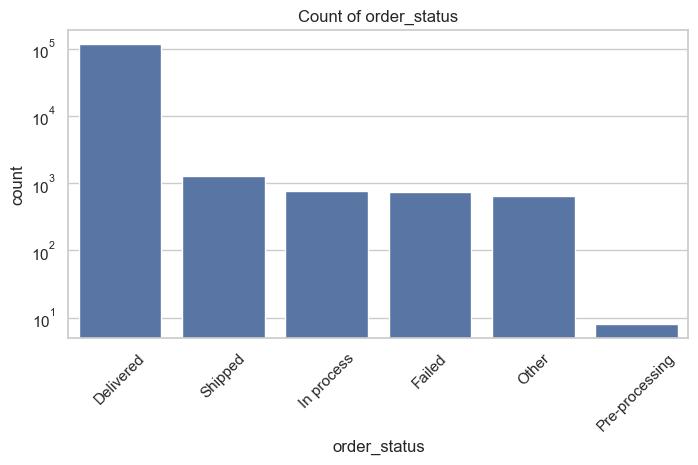

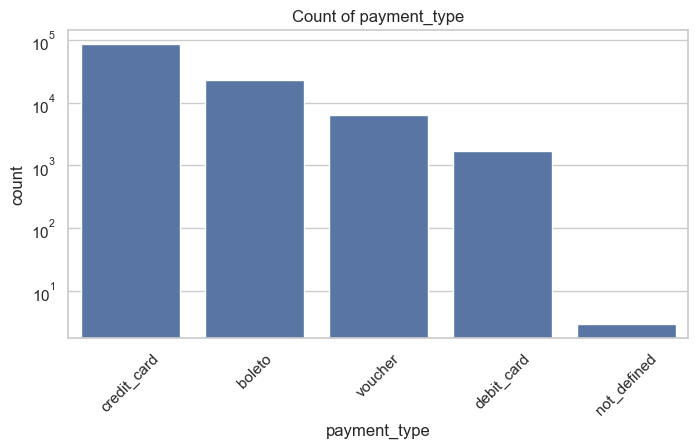

In [93]:
#categorical value counta

categorical_cols=['order_status','payment_type']

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df,order=df[col].value_counts().index)
    plt.yscale('log')
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

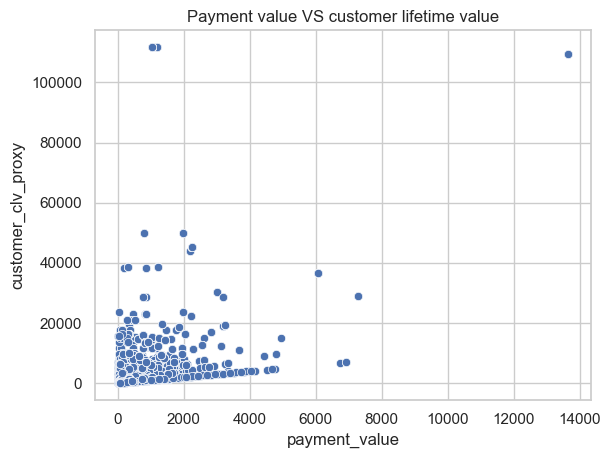

correlation:
                    payment_value  customer_clv_proxy
payment_value            1.000000            0.509493
customer_clv_proxy       0.509493            1.000000


In [94]:
#Bivariate EDA

#continous vs continous(scatter plot + correletion)
sns.scatterplot(x='payment_value', y='customer_clv_proxy', data=df)
plt.title('Payment value VS customer lifetime value')
plt.show()
print('correlation:')
print(df[['payment_value','customer_clv_proxy']].corr())

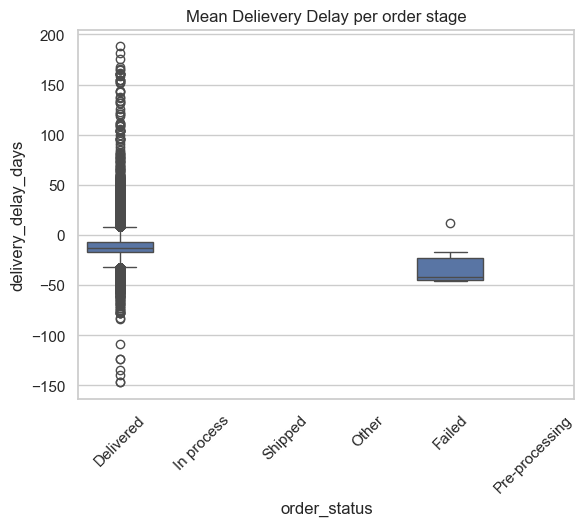

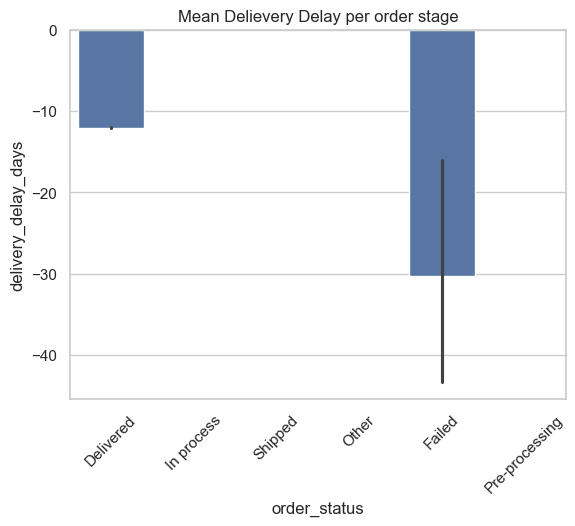

In [95]:
#continous + categorical(boxplot + barplot)

sns.boxplot(x='order_status',y='delivery_delay_days', data=df)
plt.title("Mean Delievery Delay per order stage")
plt.xticks(rotation=45)
plt.show()


sns.barplot(x='order_status',y='delivery_delay_days', data=df)
plt.title("Mean Delievery Delay per order stage")
plt.xticks(rotation=45)
plt.show()

crosstab:
cross_tab


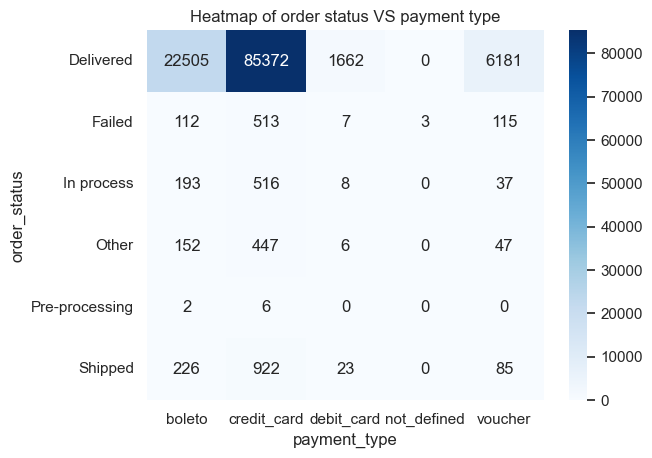

In [96]:
#Categorical vs categorical(crosstab+heatmap)
cross_tab=pd.crosstab(df['order_status'],df['payment_type'])
print('crosstab:')
print('cross_tab')

sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='.0f')
plt.title("Heatmap of order status VS payment type")
plt.show()

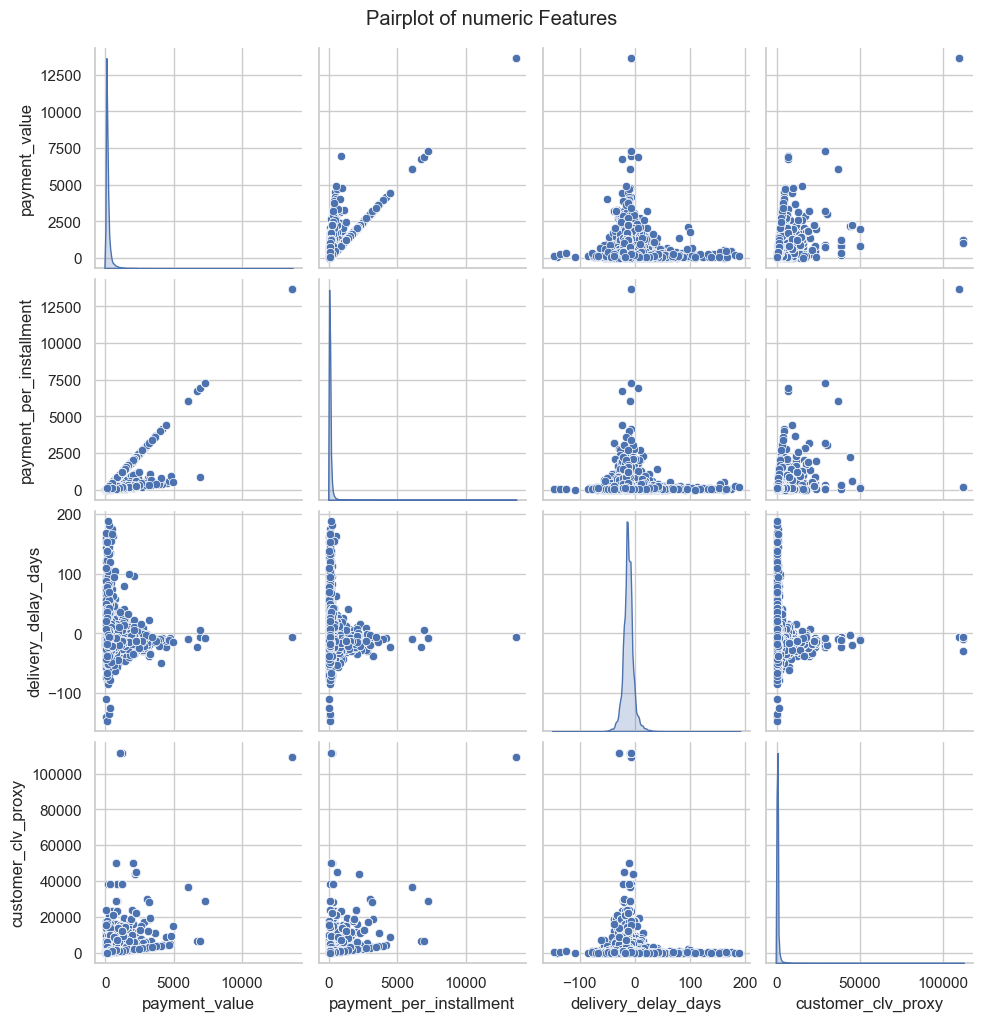

In [97]:
#Multivarite EDA

#pairplot-visalizes pairwise relationship in the dataeset(continous varibales)
sns.pairplot(df[numeric_cols],diag_kind='kde')
plt.suptitle('Pairplot of numeric Features', y=1.02)
plt.show()

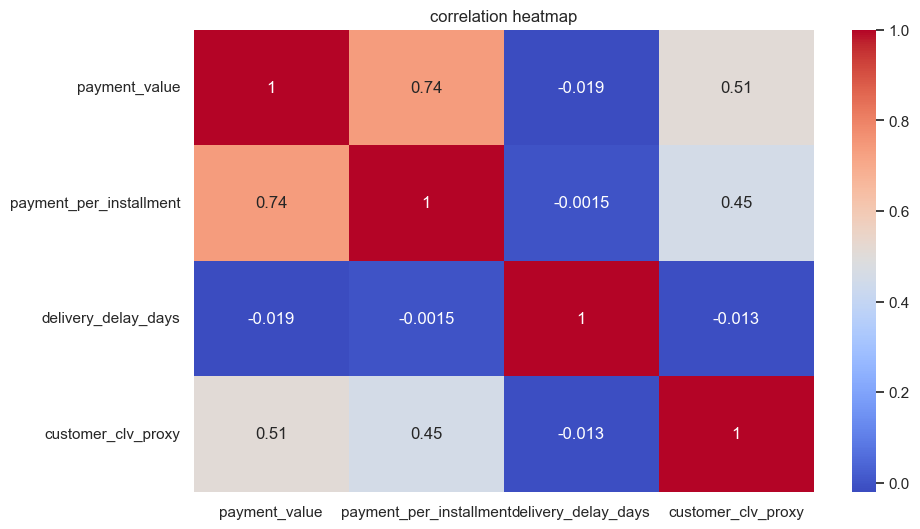

In [98]:
#multivariate heatmap(correlation between numeric varibles)

plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(),annot=True, cmap='coolwarm')
plt.title('correlation heatmap')
plt.show()

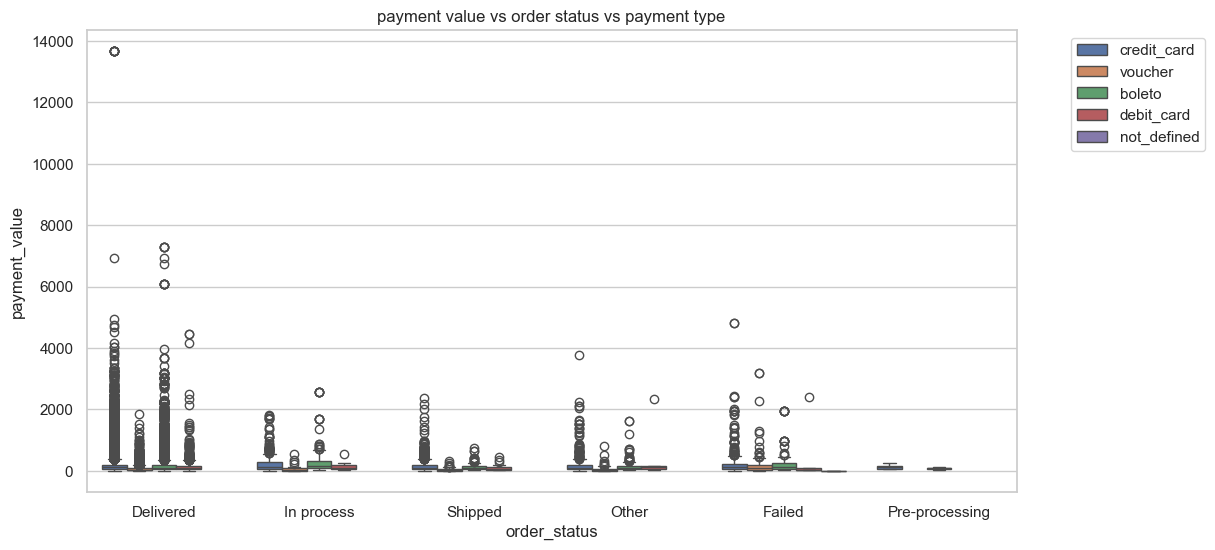

In [99]:
#boxplot of payments value vs order stage vs payment type
plt.figure(figsize=(12,6))
sns.boxplot(x='order_status',y='payment_value', hue='payment_type', data=df)
plt.title('payment value vs order status vs payment type')
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.show()

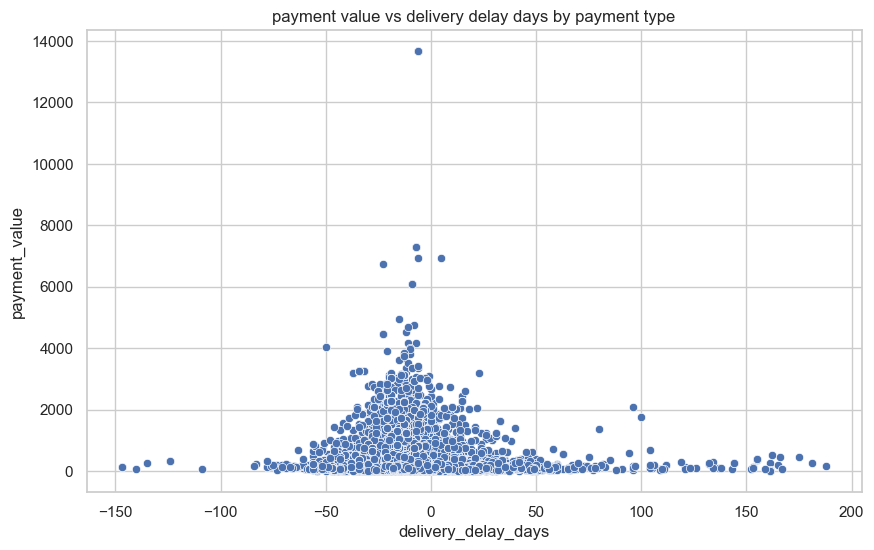

In [100]:
#Scatterplot: payment value vs deliverry delay days coloured by paymnet type
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="delivery_delay_days", y='payment_value')
plt.title('payment value vs delivery delay days by payment type')
plt.show()

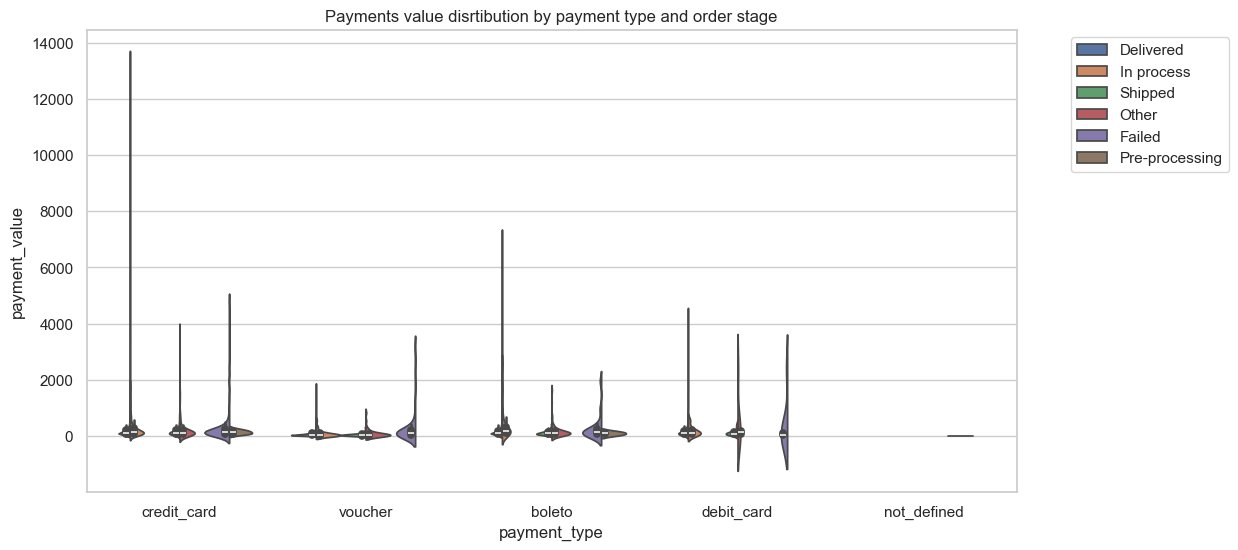

In [101]:
#violen plot: payment valye distibution across payment type and order stage

plt.figure(figsize=(12,6))
sns.violinplot(x='payment_type',y='payment_value', hue='order_status', data=df, split=True)
plt.title('Payments value disrtibution by payment type and order stage')
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.show()

In [102]:
# Exporting the cleaned data into csv for further my-sql use

#customers.to_csv('customers_cleaned.csv', index=False)
#order_items.to_csv('order_items_cleaned.csv', index=False)
#orders.to_csv('orders_cleaned.csv', index=False)
#products.to_csv('products_cleaned.csv', index=False)
#order_payments.to_csv('order_payments_cleaned.csv', index=False)
#geolocation.to_csv('geolocation_cleaned.csc', index=False)
#sellers.to_csv('sellers_cleaned.csv', index=False)
#order_reviews.to_csv('order_reviews_cleaned.csv', index=False)
#product_cateory_name.to_csv('product_cateory_name.csv', index=False)
#df.to_csv('df_cleaned.csv', index=False)